### Stock Price Predictor 

In this project, we will work on a time series problem or I can say regression problem which is a Stock Price Prediction, We will Predict the stock prices of Gold.  
You can work on any.  

Requirements:- 

- You should have completed Linear Regression Section 
- You should hvae completed the Support Vector Machine Section  

In this project, we will develop our stock price predictor using only these two predictors. In research papers, SVM, Regression algorithms  works best as compared to any other machine learning algorithms, ofc ensembling learning, stacking will work which we will study in details in further sections.  
So, let's get started with this project. 

Before you get started, be sure you have downloaded the following package:- 
```Python 
pip install yfinance 
``` 

ONLY for Educational

In [1]:
import numpy as np 
import pandas as pd   

import yfinance as yf 

import seaborn as sns 
import matplotlib.pyplot as plt   
%matplotlib inline 

In [2]:
stocks = input("Enter the code of the stock:- ") 
data = yf.download(stocks, "2008-01-01", "2021-01-18", auto_adjust=True) 
data.head()

Enter the code of the stock:- GOOGL
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2007-12-31,17.481731,17.579830,17.281782,17.304304,94952952
2008-01-02,17.339088,17.451702,16.960211,17.146896,172103724
2008-01-03,17.148649,17.188438,16.929930,17.150400,129969900
2008-01-04,17.009258,17.041040,16.391392,16.441441,214177608
2008-01-07,16.364864,16.573574,15.949700,16.247498,255879864


In [3]:
data.shape 

(3285, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3285 entries, 2007-12-31 to 2021-01-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3285 non-null   float64
 1   High    3285 non-null   float64
 2   Low     3285 non-null   float64
 3   Close   3285 non-null   float64
 4   Volume  3285 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 154.0 KB


In [5]:
data.describe()

,Open,High,Low,Close,Volume
count,3285.000000,3285.000000,3285.000000,3285.000000,3.285000e+03
mean,32.677219,32.985520,32.355026,32.679214,8.528173e+07
std,20.579967,20.791826,20.381920,20.597196,8.050127e+07
min,6.569319,6.740991,6.188689,6.442442,9.312000e+06
25%,14.607608,14.721722,14.445696,14.567317,3.259800e+07
50%,27.434000,27.650000,27.231001,27.438499,5.908086e+07
75%,49.899502,50.309502,49.513500,49.808498,1.066852e+08
max,91.027000,92.191498,90.849998,91.248497,9.305605e+08


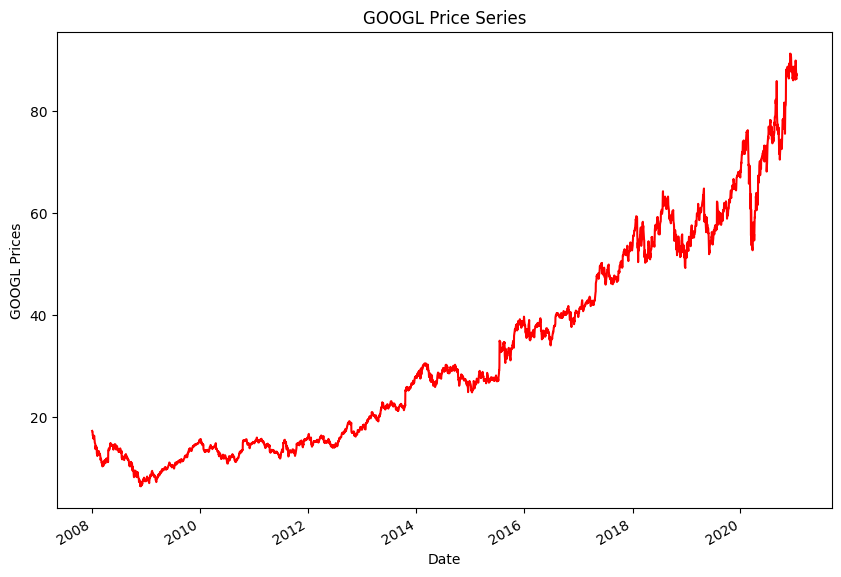

In [6]:
data.Close.plot(figsize=(10, 7),color='r')
plt.ylabel("{} Prices".format(stocks))
plt.title("{} Price Series".format(stocks))
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_23652\2693321050.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Close"])


<AxesSubplot: xlabel='Close', ylabel='Density'>

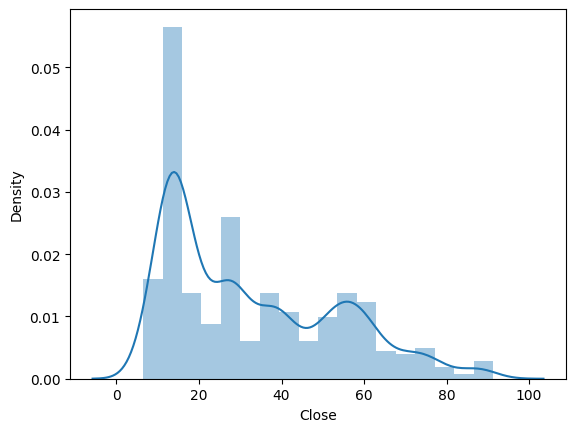

In [7]:
sns.distplot(data["Close"])

C:\Users\Hp\AppData\Local\Temp\ipykernel_23652\3218051027.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Open"])


<AxesSubplot: xlabel='Open', ylabel='Density'>

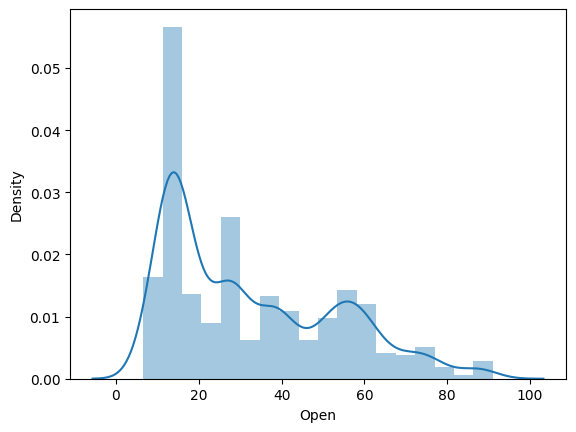

In [8]:
sns.distplot(data["Open"])

C:\Users\Hp\AppData\Local\Temp\ipykernel_23652\3277148864.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["High"])


<AxesSubplot: xlabel='High', ylabel='Density'>

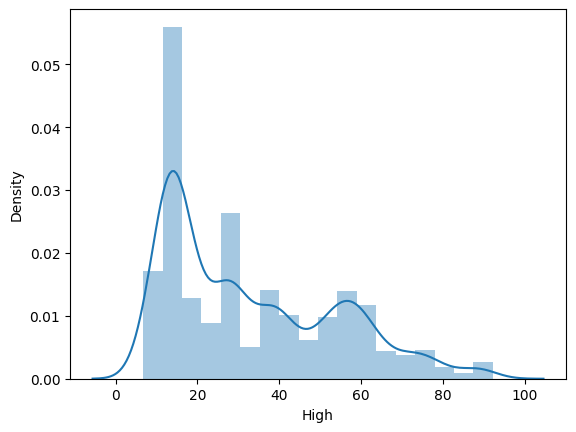

In [9]:
sns.distplot(data["High"])

In [10]:
# Conlusions  

# - Shape the of the data  
# - how our data is distributed 
# - It's very very non linear  

# Linear, Logis, Regularized, SVM 

X = data.drop("Close", axis=1) 
y = data["Close"] 

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2, random_state=0) 
print(X_train.shape) 
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape) 

(2628, 4)
(657, 4)
(2628,)
(657,)


In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() 
lr.fit(X_train, y_train) 
pred1 = lr.predict(X_test)

In [12]:
# MSE -- > Mean Squared  
# RMSE ---> sart(MSE) 
# r2_square ---> 1.0 # good model 

from sklearn.metrics import mean_squared_error, r2_score 


def calculate_metrics(y_test, y_pred):  
    ''' 
    y_test:- ground truth 
    y_pred:- model predict  
    '''
    mse = mean_squared_error(y_test, y_pred) 
    rmse = np.sqrt(mse) 
    r2_scors = r2_score(y_test, y_pred) 
    
    print("MSE:- ", mse) 
    print("RMSE:- ", rmse) 
    print("R2_score:- ", r2_scors) 
    
calculate_metrics(y_test, pred1)

MSE:-  0.06184439808983093
RMSE:-  0.2486853395152817
R2_score:-  0.9998672680504154


In [13]:
from sklearn.linear_model import Lasso, Ridge 

la = Lasso().fit(X_train, y_train )
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
la_p = la.predict(X_test) 
rr_p = rr.predict(X_test)

C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.249e+02, tolerance: 1.087e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.56103e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [14]:
calculate_metrics(y_test, la_p)

MSE:-  0.17962224129895357
RMSE:-  0.42381864199083263
R2_score:-  0.9996144903821078


In [15]:
calculate_metrics(y_test, rr_p)

MSE:-  0.061842593742026115
RMSE:-  0.24868171171605305
R2_score:-  0.9998672719229504


In [16]:
from sklearn.svm import SVR 
from sklearn.model_selection import GridSearchCV 

svr = SVR() 


param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}   

grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)    
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.031 total time=   0.3s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.058 total time=   0.3s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.059 total time=   0.3s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.066 total time=   0.3s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.102 total time=   0.3s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.031 total time=   0.3s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.058 total time=   0.3s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.059 total time=   0.3s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.066 total time=   0.3s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.102 total time=   0.3s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.031 total time=   0.3s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.001 total time=   0.4s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.001 total time=   0.4s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.001 total time=   0.4s
[CV 5/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.007 total time=   0.4s
[CV 1/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.003 total time=   0.4s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.004 total time=   0.4s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.005 total time=   0.4s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.001 total time=   0.4s
[CV 5/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.007 total time=   0.4s
[CV 1/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.002 total time=   0.4s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.009 total time=   0.4s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.011 total time=   0.4s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [17]:
svr = SVR(C=10, gamma=0.01, kernel='rbf') 
svr.fit(X_train, y_train) 
svr_pred = svr.predict(X_test) 

In [18]:
import joblib  

joblib.dump(rr, 'model.pkl') 

ridge_from_joblib = model = joblib.load("model.pkl")

In [19]:
# import pickle
# df=pd.read_pickle('model.pkl')
# print(df)

In [23]:
def preprocess(Open,High,Low,Volume):
    test_data=np.array([[Open,High,Low,Volume]])
    trained_model=joblib.load("model.pkl")
    prediction=trained_model.predict(test_data)
    return prediction
t=preprocess(97,99,97,5333575)
print("Predicted Value for the given stock is: ",t)

Predicted Value for the given stock is:  [98.62100817]


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
